# Parse EWX Ingestion Payload

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import EWX_forecast as ewx
import pprint
import json
import os

base = os.getcwd()
os.chdir('C:\\Users\wb5888\Documents\EWX')
base = os.getcwd()
pp = pprint.PrettyPrinter(3)

## Show json files, parse ingest

In [13]:
filedf = ewx.sortdir(base, 5)
json_file = filedf.files[1]
json_file

files found in dir:  C:\Users\wb5888\Documents\EWX
                                               files                time
0                     NEPOOL_PSNH_80059230112_ts.csv 2019-10-21 07:45:42
1  20191021020905149000_NEPOOL_PSNH_80059230112.json 2019-10-21 07:39:22
2   20191018144604361000_NEPOOL_MECO_8760281014.json 2019-10-18 14:50:18
3                 NEPOOL_MECO_8760281014_ch3_adj.csv 2019-10-18 14:48:50
4                NEPOOL_MECO_8760281014_ch3_adj.xlsx 2019-10-18 14:48:10


'20191021020905149000_NEPOOL_PSNH_80059230112.json'

In [14]:
with open(json_file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    idr = acct['timeseriesdataidr'] #dictionary of acct attributes
    sca = acct['timeseriesdatascalar']

pp.pprint(acct)

loading json...
{  'accountnumber': '80059230112',
   'captag': [  {  'lstime': '2019-03-14 09:55:49',
                   'lsuser': 'IT_TM',
                   'start': '2018-06-01 00:00:00',
                   'stop': '2019-05-31 23:59:59',
                   'sv': None,
                   'v': 188.36200000000002}],
   'cogenflag': None,
   'discocode': 'PSNH',
   'forecastflag': 'Y',
   'lossclass': 'GV',
   'market': 'NEPOOL',
   'meterreadcycle': 15,
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': '670 N COMMERCIAL ST ',
                 'city': 'MANCHESTER',
                 'country': 'USA',
                 'county': None,
                 'customerid': '1-BRR73X',
                 'name': 'BRADY SULLIVAN PROPERTIES, LLC',
                 'state': 'NH',
                 'zip': '03101'},
   'prid': None,
   'prnumber': None,
   'profilebuilder': 'I',
   'profileclass': 'GV_IDR',
   'rateclass': 'GV',
   'ratesubclass': None,
   'rechargeny': None,
   

## Scalar

In [ ]:
sca = pd.DataFrame(sca)
sca

## Tags

In [ ]:
caps = pd.DataFrame.from_records(acct['captag'])
caps

## Plot ingest IDR

In [ ]:
reads = idr[0]['reads']
temp = pd.DataFrame.from_dict(reads)
temp['v'] = pd.to_numeric(temp['v'])
temp.plot(y = 'v')

## Read in adjusted IDR

In [17]:
filedf = ewx.sortdir(base, 5)
csv_file = filedf.files[0]
csv_file

files found in dir:  C:\Users\wb5888\Documents\EWX
                                               files                time
0                     NEPOOL_PSNH_80059230112_ts.csv 2019-10-21 07:45:42
1  20191021020905149000_NEPOOL_PSNH_80059230112.json 2019-10-21 07:39:22
2   20191018144604361000_NEPOOL_MECO_8760281014.json 2019-10-18 14:50:18
3                 NEPOOL_MECO_8760281014_ch3_adj.csv 2019-10-18 14:48:50
4                NEPOOL_MECO_8760281014_ch3_adj.xlsx 2019-10-18 14:48:10


'NEPOOL_PSNH_80059230112_ts.csv'

<IPython.core.display.Javascript object>


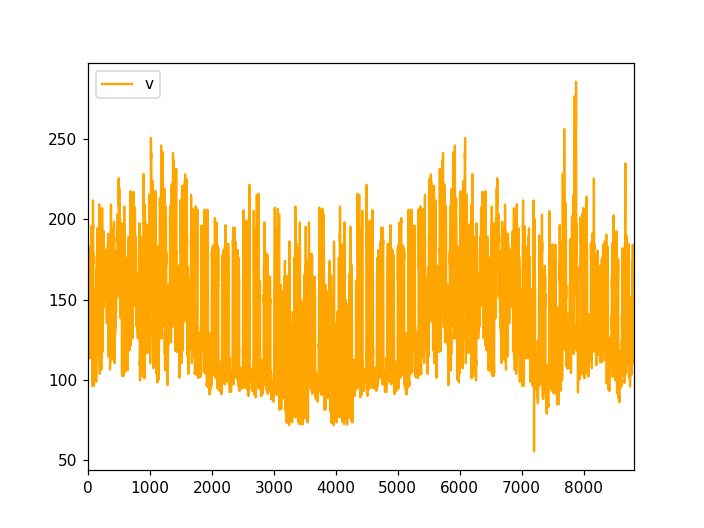

In [19]:
new_idr = pd.read_csv(csv_file)
new_idr.columns = ['t', 'v']
new_idr['t'] = pd.to_datetime(new_idr['t'])
new_idr.plot(y = 'v', color = 'orange')

In [20]:
new_idr['t'] = [str(t) for t in new_idr.t]
new_idr['v'] = [str(v) for v in new_idr.v]
json_df = new_idr.to_json(orient = 'records')
json_df = json.loads(json_df)

## Add IDR to IDR payload

In [ ]:
idr[0]['reads'] = json_df

## Add IDR to scalar payload

In [21]:
acct['timeseriesdataidr'] = []
idr.append(dict([('reads', json_df)]))
acct['timeseriesdataidr'] = idr

In [22]:
pp.pprint(acct)

{  'accountnumber': '80059230112',
   'captag': [  {  'lstime': '2019-03-14 09:55:49',
                   'lsuser': 'IT_TM',
                   'start': '2018-06-01 00:00:00',
                   'stop': '2019-05-31 23:59:59',
                   'sv': None,
                   'v': 188.36200000000002}],
   'cogenflag': None,
   'discocode': 'PSNH',
   'forecastflag': 'Y',
   'lossclass': 'GV',
   'market': 'NEPOOL',
   'meterreadcycle': 15,
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': '670 N COMMERCIAL ST ',
                 'city': 'MANCHESTER',
                 'country': 'USA',
                 'county': None,
                 'customerid': '1-BRR73X',
                 'name': 'BRADY SULLIVAN PROPERTIES, LLC',
                 'state': 'NH',
                 'zip': '03101'},
   'prid': None,
   'prnumber': None,
   'profilebuilder': 'I',
   'profileclass': 'GV_IDR',
   'rateclass': 'GV',
   'ratesubclass': None,
   'rechargeny': None,
   'revision': None

                                          {  't': '2018-01-19 10:00:00',
                                             'v': '136.6200027'},
                                          {  't': '2018-01-19 11:00:00',
                                             'v': '133.38000490000002'},
                                          {  't': '2018-01-19 12:00:00',
                                             'v': '134.46'},
                                          {  't': '2018-01-19 13:00:00',
                                             'v': '135.54'},
                                          {  't': '2018-01-19 14:00:00',
                                             'v': '137.5200081'},
                                          {  't': '2018-01-19 15:00:00',
                                             'v': '145.0800095'},
                                          {  't': '2018-01-19 16:00:00',
                                             'v': '155.3400116'},
                              

                                             'v': '142.7400055'},
                                          {  't': '2018-02-03 14:00:00',
                                             'v': '138.7800064'},
                                          {  't': '2018-02-03 15:00:00',
                                             'v': '131.0400085'},
                                          {  't': '2018-02-03 16:00:00',
                                             'v': '129.0600052'},
                                          {  't': '2018-02-03 17:00:00',
                                             'v': '151.2000046'},
                                          {  't': '2018-02-03 18:00:00',
                                             'v': '154.2600021'},
                                          {  't': '2018-02-03 19:00:00',
                                             'v': '154.08000180000002'},
                                          {  't': '2018-02-03 20:00:00',
                    

                                          {  't': '2018-02-22 12:00:00',
                                             'v': '178.0200119'},
                                          {  't': '2018-02-22 13:00:00',
                                             'v': '175.68000790000002'},
                                          {  't': '2018-02-22 14:00:00',
                                             'v': '171.5400085'},
                                          {  't': '2018-02-22 15:00:00',
                                             'v': '179.1000061'},
                                          {  't': '2018-02-22 16:00:00',
                                             'v': '122.94000630000001'},
                                          {  't': '2018-02-22 17:00:00',
                                             'v': '129.2400055'},
                                          {  't': '2018-02-22 18:00:00',
                                             'v': '126.00000379999999'},
      

                                             'v': '106.9200058'},
                                          {  't': '2018-03-09 16:00:00',
                                             'v': '103.68000409999999'},
                                          {  't': '2018-03-09 17:00:00',
                                             'v': '105.84000400000001'},
                                          {  't': '2018-03-09 18:00:00',
                                             'v': '109.4400024'},
                                          {  't': '2018-03-09 19:00:00',
                                             'v': '116.2800064'},
                                          {  't': '2018-03-09 20:00:00',
                                             'v': '118.80000690000001'},
                                          {  't': '2018-03-09 21:00:00',
                                             'v': '118.62000659999998'},
                                          {  't': '2018-03-09 22:00:00',

                                          {  't': '2018-03-24 19:00:00',
                                             'v': '100.260006'},
                                          {  't': '2018-03-24 20:00:00',
                                             'v': '99.00000381'},
                                          {  't': '2018-03-24 21:00:00',
                                             'v': '100.08000559999999'},
                                          {  't': '2018-03-24 22:00:00',
                                             'v': '101.7000046'},
                                          {  't': '2018-03-24 23:00:00',
                                             'v': '97.02000046'},
                                          {  't': '2018-03-25 00:00:00',
                                             'v': '98.6400032'},
                                          {  't': '2018-03-25 01:00:00',
                                             'v': '101.88000490000002'},
               

                                             'v': '106.38000490000002'},
                                          {  't': '2018-04-12 18:00:00',
                                             'v': '108.18000409999999'},
                                          {  't': '2018-04-12 19:00:00',
                                             'v': '106.9200058'},
                                          {  't': '2018-04-12 20:00:00',
                                             'v': '102.24000550000001'},
                                          {  't': '2018-04-12 21:00:00',
                                             'v': '100.44000240000001'},
                                          {  't': '2018-04-12 22:00:00',
                                             'v': '102.6000023'},
                                          {  't': '2018-04-12 23:00:00',
                                             'v': '98.28000259'},
                                          {  't': '2018-04-13 00:00:00',

                                          {  't': '2018-04-27 21:00:00',
                                             'v': '103.86000440000001'},
                                          {  't': '2018-04-27 22:00:00',
                                             'v': '111.420002'},
                                          {  't': '2018-04-27 23:00:00',
                                             'v': '109.9800034'},
                                          {  't': '2018-04-28 00:00:00',
                                             'v': '105.4800034'},
                                          {  't': '2018-04-28 01:00:00',
                                             'v': '112.50000759999999'},
                                          {  't': '2018-04-28 02:00:00',
                                             'v': '112.50000379999999'},
                                          {  't': '2018-04-28 03:00:00',
                                             'v': '110.70000459999999'},


                                          {  't': '2018-05-15 22:00:00',
                                             'v': '79.92000198'},
                                          {  't': '2018-05-15 23:00:00',
                                             'v': '85.1400032'},
                                          {  't': '2018-05-16 00:00:00',
                                             'v': '79.74000168'},
                                          {  't': '2018-05-16 01:00:00',
                                             'v': '75.4200058'},
                                          {  't': '2018-05-16 02:00:00',
                                             'v': '75.24000549'},
                                          {  't': '2018-05-16 03:00:00',
                                             'v': '82.08000183'},
                                          {  't': '2018-05-16 04:00:00',
                                             'v': '81.72000122'},
                             

                                          {  't': '2018-05-31 23:00:00',
                                             'v': '100.08000179999999'},
                                          {  't': '2018-06-01 00:00:00',
                                             'v': '97.92000198'},
                                          {  't': '2018-06-01 01:00:00',
                                             'v': '95.40000534'},
                                          {  't': '2018-06-01 02:00:00',
                                             'v': '97.56000137'},
                                          {  't': '2018-06-01 03:00:00',
                                             'v': '101.1600037'},
                                          {  't': '2018-06-01 04:00:00',
                                             'v': '128.7000046'},
                                          {  't': '2018-06-01 05:00:00',
                                             'v': '121.8600082'},
                    

                                             'v': '185.0400085'},
                                          {  't': '2018-06-22 12:00:00',
                                             'v': '198.00000759999998'},
                                          {  't': '2018-06-22 13:00:00',
                                             'v': '171.00000759999998'},
                                          {  't': '2018-06-22 14:00:00',
                                             'v': '134.1000061'},
                                          {  't': '2018-06-22 15:00:00',
                                             'v': '112.50000759999999'},
                                          {  't': '2018-06-22 16:00:00',
                                             'v': '101.5200043'},
                                          {  't': '2018-06-22 17:00:00',
                                             'v': '88.02000427'},
                                          {  't': '2018-06-22 18:00:00',
      

                                          {  't': '2018-07-01 06:00:00',
                                             'v': '130.140007'},
                                          {  't': '2018-07-01 07:00:00',
                                             'v': '172.9800072'},
                                          {  't': '2018-07-01 08:00:00',
                                             'v': '215.82000730000004'},
                                          {  't': '2018-07-01 09:00:00',
                                             'v': '208.4400101'},
                                          {  't': '2018-07-01 10:00:00',
                                             'v': '177.1200104'},
                                          {  't': '2018-07-01 11:00:00',
                                             'v': '184.86000819999998'},
                                          {  't': '2018-07-01 12:00:00',
                                             'v': '177.840004'},
               

                                          {  't': '2018-07-18 11:00:00',
                                             'v': '186.6600113'},
                                          {  't': '2018-07-18 12:00:00',
                                             'v': '186.8400116'},
                                          {  't': '2018-07-18 13:00:00',
                                             'v': '186.48001100000002'},
                                          {  't': '2018-07-18 14:00:00',
                                             'v': '185.4000015'},
                                          {  't': '2018-07-18 15:00:00',
                                             'v': '172.80001069999997'},
                                          {  't': '2018-07-18 16:00:00',
                                             'v': '154.98001100000002'},
                                          {  't': '2018-07-18 17:00:00',
                                             'v': '129.2400055'},
      

                                          {  't': '2018-08-05 15:00:00',
                                             'v': '198.36000819999998'},
                                          {  't': '2018-08-05 16:00:00',
                                             'v': '191.3400116'},
                                          {  't': '2018-08-05 17:00:00',
                                             'v': '162.5400085'},
                                          {  't': '2018-08-05 18:00:00',
                                             'v': '161.82000730000001'},
                                          {  't': '2018-08-05 19:00:00',
                                             'v': '157.50000759999998'},
                                          {  't': '2018-08-05 20:00:00',
                                             'v': '114.48000719999999'},
                                          {  't': '2018-08-05 21:00:00',
                                             'v': '111.2400055'},

                                             'v': '179.82000730000001'},
                                          {  't': '2018-08-25 10:00:00',
                                             'v': '179.280014'},
                                          {  't': '2018-08-25 11:00:00',
                                             'v': '181.9800034'},
                                          {  't': '2018-08-25 12:00:00',
                                             'v': '178.92001340000002'},
                                          {  't': '2018-08-25 13:00:00',
                                             'v': '200.7000122'},
                                          {  't': '2018-08-25 14:00:00',
                                             'v': '215.46000669999998'},
                                          {  't': '2018-08-25 15:00:00',
                                             'v': '231.30001069999997'},
                                          {  't': '2018-08-25 16:00:00',


                                          {  't': '2018-09-11 05:00:00',
                                             'v': '185.9400101'},
                                          {  't': '2018-09-11 06:00:00',
                                             'v': '153.9000092'},
                                          {  't': '2018-09-11 07:00:00',
                                             'v': '142.0200043'},
                                          {  't': '2018-09-11 08:00:00',
                                             'v': '225.36000819999998'},
                                          {  't': '2018-09-11 09:00:00',
                                             'v': '238.5000153'},
                                          {  't': '2018-09-11 10:00:00',
                                             'v': '240.480011'},
                                          {  't': '2018-09-11 11:00:00',
                                             'v': '240.66001129999998'},
              

                                          {  't': '2018-09-28 15:00:00',
                                             'v': '146.5200043'},
                                          {  't': '2018-09-28 16:00:00',
                                             'v': '140.9400101'},
                                          {  't': '2018-09-28 17:00:00',
                                             'v': '161.2800064'},
                                          {  't': '2018-09-28 18:00:00',
                                             'v': '155.5200043'},
                                          {  't': '2018-09-28 19:00:00',
                                             'v': '156.6000061'},
                                          {  't': '2018-09-28 20:00:00',
                                             'v': '142.56000519999998'},
                                          {  't': '2018-09-28 21:00:00',
                                             'v': '136.260006'},
                     

                                          {  't': '2018-10-19 02:00:00',
                                             'v': '128.8800011'},
                                          {  't': '2018-10-19 03:00:00',
                                             'v': '131.5800018'},
                                          {  't': '2018-10-19 04:00:00',
                                             'v': '128.1600037'},
                                          {  't': '2018-10-19 05:00:00',
                                             'v': '123.12000659999998'},
                                          {  't': '2018-10-19 06:00:00',
                                             'v': '122.58000179999999'},
                                          {  't': '2018-10-19 07:00:00',
                                             'v': '123.6600037'},
                                          {  't': '2018-10-19 08:00:00',
                                             'v': '120.6000061'},
             

                                             'v': '104.220005'},
                                          {  't': '2018-11-07 01:00:00',
                                             'v': '104.9400024'},
                                          {  't': '2018-11-07 02:00:00',
                                             'v': '104.220005'},
                                          {  't': '2018-11-07 03:00:00',
                                             'v': '125.64000700000001'},
                                          {  't': '2018-11-07 04:00:00',
                                             'v': '121.68000409999999'},
                                          {  't': '2018-11-07 05:00:00',
                                             'v': '118.62000659999998'},
                                          {  't': '2018-11-07 06:00:00',
                                             'v': '191.3400116'},
                                          {  't': '2018-11-07 07:00:00',
        

                                          {  't': '2018-11-22 04:00:00',
                                             'v': '141.4800034'},
                                          {  't': '2018-11-22 05:00:00',
                                             'v': '149.2200089'},
                                          {  't': '2018-11-22 06:00:00',
                                             'v': '177.840004'},
                                          {  't': '2018-11-22 07:00:00',
                                             'v': '164.16000369999998'},
                                          {  't': '2018-11-22 08:00:00',
                                             'v': '178.9200058'},
                                          {  't': '2018-11-22 09:00:00',
                                             'v': '188.82000730000001'},
                                          {  't': '2018-11-22 10:00:00',
                                             'v': '185.7600021'},
              

                                             'v': '156.06000519999998'},
                                          {  't': '2018-12-11 03:00:00',
                                             'v': '168.30001069999997'},
                                          {  't': '2018-12-11 04:00:00',
                                             'v': '165.06000519999998'},
                                          {  't': '2018-12-11 05:00:00',
                                             'v': '171.00000759999998'},
                                          {  't': '2018-12-11 06:00:00',
                                             'v': '165.6000061'},
                                          {  't': '2018-12-11 07:00:00',
                                             'v': '156.96000669999998'},
                                          {  't': '2018-12-11 08:00:00',
                                             'v': '155.7000046'},
                                          {  't': '2018-12-11 09:

                                          {  't': '2018-12-26 06:00:00',
                                             'v': '147.4200058'},
                                          {  't': '2018-12-26 07:00:00',
                                             'v': '148.8600006'},
                                          {  't': '2018-12-26 08:00:00',
                                             'v': '153.36000819999998'},
                                          {  't': '2018-12-26 09:00:00',
                                             'v': '160.56000519999998'},
                                          {  't': '2018-12-26 10:00:00',
                                             'v': '178.56000519999998'},
                                          {  't': '2018-12-26 11:00:00',
                                             'v': '181.9800034'},
                                          {  't': '2018-12-26 12:00:00',
                                             'v': '175.68000790000002'},

## Write modified .json file

In [23]:
json_file

'20191021020905149000_NEPOOL_PSNH_80059230112.json'

In [25]:
fp = os.path.join(base, json_file)
final_json = json.dumps(data)

with open(json_file, 'w') as f:
    f.write(final_json)